Upload your CSV file (e.g., data.csv):


Saving data.csv to data.csv

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



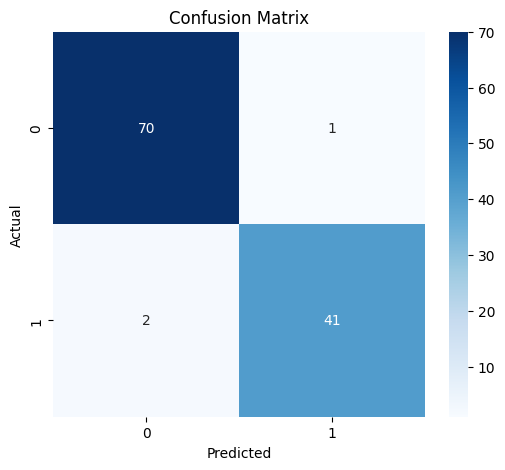

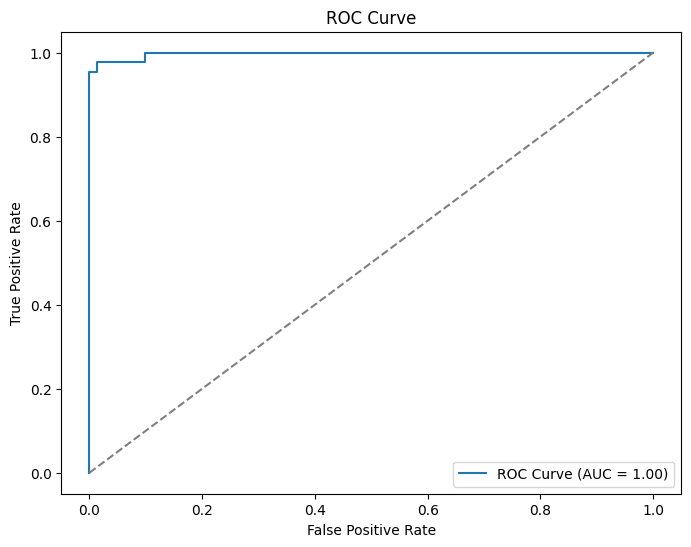


Sigmoid output for one sample:
Sigmoid output: 0.1136
Predicted label at threshold 0.5: 0

Precision and Recall at Different Thresholds:
Threshold = 0.3 => Precision: 0.91, Recall: 0.98
Threshold = 0.4 => Precision: 0.98, Recall: 0.98
Threshold = 0.5 => Precision: 0.98, Recall: 0.95
Threshold = 0.6 => Precision: 1.00, Recall: 0.95
Threshold = 0.7 => Precision: 1.00, Recall: 0.95


In [1]:
# Logistic Regression Binary Classifier with File Upload (Colab/Jupyter)

# Imports
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_score, recall_score
)

# Step 1: Upload the dataset
print("Upload your CSV file (e.g., data.csv):")
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

# Step 2: Preprocessing
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions
probs = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (probs >= 0.5).astype(int)

# Step 7: Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 8: Sigmoid Output Example
print("\nSigmoid output for one sample:")
sample = X_test_scaled[0].reshape(1, -1)
sigmoid_output = model.predict_proba(sample)[0][1]
print(f"Sigmoid output: {sigmoid_output:.4f}")
print(f"Predicted label at threshold 0.5: {int(sigmoid_output >= 0.5)}")

# Step 9: Threshold Tuning
print("\nPrecision and Recall at Different Thresholds:")
for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
    y_thresh = (probs >= threshold).astype(int)
    precision = precision_score(y_test, y_thresh)
    recall = recall_score(y_test, y_thresh)
    print(f"Threshold = {threshold:.1f} => Precision: {precision:.2f}, Recall: {recall:.2f}")
